In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
df = pd.read_csv(r'train_v9rqX0R.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df['Item_Weight'].mean()

12.857645184136183

In [7]:
df['Item_Weight'] = df['Item_Weight'].fillna(12.85)

In [8]:
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [9]:
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [10]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [12]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012112,0.024762,-0.007825,0.011495
Item_Visibility,-0.012112,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024762,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.007825,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011495,-0.128625,0.567574,-0.049135,1.000000


In [13]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [254]:
#label encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label = LabelEncoder()

In [16]:
df['Item_Identifier'] = label.fit_transform(df['Item_Identifier'])

In [17]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [ ]:
df['Item_Identifier'] = label.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = label.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = label.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = label.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = label.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = label.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = label.fit_transform(df['Outlet_Type'])

In [18]:
df['Item_Fat_Content'] = label.fit_transform(df['Item_Fat_Content'])

In [19]:
df['Item_Type'] = label.fit_transform(df['Item_Type'])

In [20]:
df['Outlet_Identifier'] = label.fit_transform(df['Outlet_Identifier'])

In [21]:
df['Outlet_Size'] = label.fit_transform(df['Outlet_Size'])

In [22]:
df['Outlet_Location_Type'] = label.fit_transform(df['Outlet_Location_Type'])

In [23]:
df['Outlet_Type'] = label.fit_transform(df['Outlet_Type'])

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [25]:
#free train madel

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [27]:
tree = DecisionTreeRegressor()
rand = RandomForestRegressor()
grad = GradientBoostingRegressor()
ada  =AdaBoostRegressor()

In [28]:
x = df.iloc[:,:-1]

In [29]:
y = df.iloc[:,-1]

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.20)

In [31]:
tree.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [32]:
rand.fit(xtrain,ytrain)

RandomForestRegressor()

In [33]:
grad.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [34]:
ada.fit(xtrain,ytrain)

AdaBoostRegressor()

In [35]:
print(tree.score(xtrain,ytrain))
print(tree.score(xtest,ytest))

1.0
0.17182560433749394


In [36]:
print(rand.score(xtrain,ytrain))
print(rand.score(xtest,ytest))

0.9383258421803071
0.557809747116506


In [37]:
print(grad.score(xtrain,ytrain))
print(grad.score(xtest,ytest))

0.637038280264959
0.5947770370618761


In [38]:
print(ada.score(xtrain,ytrain))
print(ada.score(xtest,ytest))

0.2975213547661556
0.2570772342975457


In [39]:
#preprocessing

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

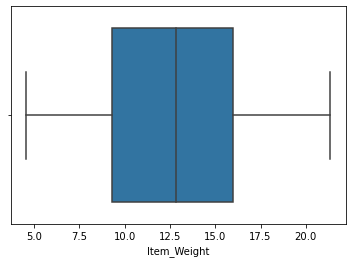

In [41]:
sns.boxplot(df['Item_Weight'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

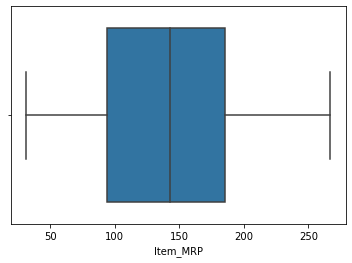

In [42]:
sns.boxplot(df['Item_MRP'])

In [255]:
#outlier

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

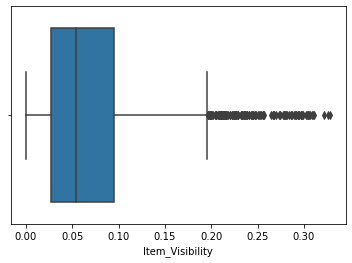

In [43]:
sns.boxplot(df['Item_Visibility'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

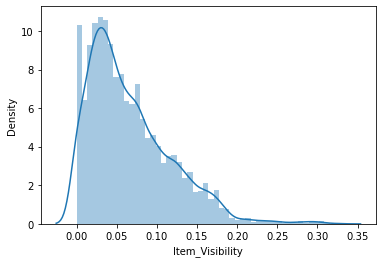

In [44]:
sns.distplot(df['Item_Visibility'])

In [45]:
q1 = df['Item_Visibility'].quantile(0.25)
q3 = df['Item_Visibility'].quantile(0.75)

In [46]:
iqr = q3-q1

In [47]:
low = q1 - 1.5*iqr
low

-0.07440424500000001

In [48]:
high = q3 + 1.5*iqr
high

0.195979015

In [49]:
df = df[(df['Item_Visibility'] < 0.18)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

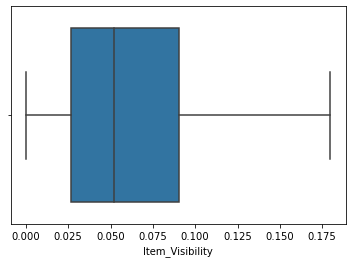

In [50]:
sns.boxplot(df['Item_Visibility'])

In [51]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [171]:
from sklearn.metrics import mean_squared_error,r2_score

In [173]:
tree1 =  DecisionTreeRegressor(max_depth=5)

In [174]:
tree1.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5)

In [175]:
tree1.score(xtrain,ytrain)

0.6052391303139888

In [176]:
tree1.score(xtest,ytest)

0.5877545673125983

In [177]:
treepred = tree.predict(xtest)

In [178]:
mean_squared_error(treepred,ytest)

2425247.037419918

In [179]:
r2_score(treepred,ytest)

0.2034236646445221

In [78]:
#random model

In [110]:
rand1 = RandomForestRegressor(max_depth = 5, n_estimators=200)

In [111]:
rand1.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [112]:
rand1.score(xtrain,ytrain)

0.6112756027808152

In [113]:
rand1.score(xtest,ytest)

0.5948890709294095

In [114]:
randpred = rand1.predict(xtest)

In [115]:
mean_squared_error(randpred,ytest)

1186337.1841735397

In [181]:
r2_score(randpred,ytest)

0.3211277349625412

In [116]:
#ada boost

In [155]:
ada1 = AdaBoostRegressor( n_estimators=100,learning_rate=1.0)

In [156]:
ada1.fit(xtrain,ytrain)

AdaBoostRegressor(n_estimators=100)

In [157]:
ada1.score(xtrain,ytrain)

0.4356977220699646

In [158]:
ada1.score(xtest,ytest)

0.38918314966403444

In [159]:
adapred = ada1.predict(xtest)

In [160]:
mean_squared_error(adapred,ytest)

1788731.6541565142

In [182]:
r2_score(adapred,ytest)

-0.3973697023029543

In [183]:
#grad

In [224]:
grad1 = GradientBoostingRegressor(learning_rate = 0.01, max_depth =3, n_estimators=500)

In [225]:
grad1.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)

In [226]:
grad1.score(xtrain,ytrain)

0.6206518033252737

In [227]:
grad1.score(xtest,ytest)

0.5994414763972387

In [228]:
gradpred = grad1.predict(xtest)

In [229]:
mean_squared_error(gradpred,ytest)

1173005.803812336

In [230]:
r2_score(gradpred,ytest)

0.2815798382515604

In [256]:
#hyperparameter tuning

In [191]:
from sklearn.model_selection import GridSearchCV

In [200]:
param_dist = {"max_depth": [2, 6], "max_features": [1,3,4,5,7,8,9], 
              "min_samples_leaf": [1,3,4,5,6,7]}

In [201]:
tree

DecisionTreeRegressor()

In [202]:

tree_cv = GridSearchCV(tree, param_dist, cv = 5)
tree_cv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 6],
                         'max_features': [1, 3, 4, 5, 7, 8, 9],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7]})

In [203]:
print("Tuned Decision Tree Parameters with GridSearchCV: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters with GridSearchCV: {'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.5919133912178495


In [204]:
#random

In [207]:
estimator = RandomForestRegressor()

In [206]:

    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [210]:
grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [211]:
grid.best_score_ , grid.best_params_

(0.5779717130469944,
 {'bootstrap': True,
  'max_features': 'log2',
  'min_samples_split': 8,
  'n_estimators': 30})

In [213]:
gbc = GradientBoostingRegressor()

In [214]:

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [216]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(xtrain,ytrain.ravel())

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encoun

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  r

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow enco

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:691: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in re

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:249: RuntimeWarning: invalid value encountered in add
  raw_predictions[:, k] += learning_rate * tree.predict(X).ravel()
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: User

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:249: RuntimeWarning: invalid value encountered in add
  raw_predictions[:, k] += learning_rate * tree.predict(X).ravel()
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: User

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow enc

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:249: RuntimeWarning: invalid value encountered in add
  raw_predictions[:, k] += learning_rate * tree.predict(X).ravel()
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklear

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:249: RuntimeWarning: invalid 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow enc

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_s

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Use

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:249: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encount

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:249: RuntimeWarning: overflow encountered in multiply
  raw_predictions[:, k] += learning_rate * tree.predict(X).ravel()
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarni

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb_losses.py:202: RuntimeWarning: overflow

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [218]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [231]:
#model

In [235]:
tree11 = DecisionTreeRegressor(max_depth = 6, max_features = 8, min_samples_leaf =6)

In [236]:
tree11.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=6, max_features=8, min_samples_leaf=6)

In [239]:
predtree1 = tree11.predict(xtest)

In [240]:
mean_squared_error(predtree1,ytest)

1225446.372187452

In [251]:
tree11.score(xtrain,ytrain)

0.6054940150577084

In [252]:
tree11.score(xtest,ytest)

0.5815340486786741

In [242]:
estimator = RandomForestRegressor(bootstrap = True,
  max_features= 'log2',
  min_samples_split= 8,
  n_estimators =  30)

In [243]:
estimator.fit(xtrain,ytrain)

RandomForestRegressor(max_features='log2', min_samples_split=8, n_estimators=30)

In [244]:
randest = estimator.predict(xtest)

In [246]:
mean_squared_error(randest,ytest)

1232049.6709454728

In [249]:
estimator.score(xtrain,ytrain)

0.8329463023095642

In [250]:
estimator.score(xtest,ytest)

0.5792791513944284

In [253]:
#-----------------------------------------------------------
#model

In [277]:
test = pd.read_csv(r'test_AbJTz2l.csv')

In [278]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [280]:
pp = test[['Item_Identifier','Outlet_Identifier']]

In [281]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [282]:
test['Item_Weight'].mean()

12.695633368756374

In [283]:
test['Item_Weight'] = test['Item_Weight'].fillna(12.69)

In [284]:
test['Outlet_Size'].mode()

0    Medium
dtype: object

In [285]:
test['Outlet_Size'] = test['Outlet_Size'].fillna('Medium')

In [286]:
test['Item_Identifier'] = label.fit_transform(test['Item_Identifier'])
test['Item_Fat_Content'] = label.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = label.fit_transform(test['Item_Type'])
test['Outlet_Identifier'] = label.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size'] = label.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = label.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = label.fit_transform(test['Outlet_Type'])

In [287]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.690,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,1,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,1,1,1


In [288]:
prediction = tree11.predict(test)

In [289]:
prediction = pd.DataFrame(prediction)

In [290]:
prediction.columns=['Item_Outlet_Sales']

In [291]:
prediction

,Item_Outlet_Sales
0,1814.240749
1,1814.240749
2,567.910755
3,2564.514480
4,5634.430733
...,...
5676,1814.240749
5677,2455.627284
5678,1693.040627
5679,3711.846512


In [293]:
market_store = pd.concat([pp,prediction],axis =1)

In [294]:
market_store.to_csv('market_store_prediction.csv')